In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


dataB = pd.read_csv('face_landmarks.csv')
data = dataB.drop(dataB.columns[[0, 1]], axis=1)


In [14]:
data.columns

Index(['landmark_0_y', 'landmark_0_z', 'landmark_1_x', 'landmark_1_y',
       'landmark_1_z', 'landmark_2_x', 'landmark_2_y', 'landmark_2_z',
       'landmark_3_x', 'landmark_3_y',
       ...
       'landmark_474_z', 'landmark_475_x', 'landmark_475_y', 'landmark_475_z',
       'landmark_476_x', 'landmark_476_y', 'landmark_476_z', 'landmark_477_x',
       'landmark_477_y', 'landmark_477_z'],
      dtype='object', length=1433)

In [15]:
normalized_data = (data - data.mean()) / data.std()

In [16]:

covariance_matrix = np.cov(normalized_data, rowvar=False)


eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
eigenvalues = np.where(eigenvalues < 1e-10, 0.0000000001, eigenvalues)

print(eigenvalues)

inertie = eigenvalues / np.sum(eigenvalues) * 100

print("Inertie:", sorted(np.round(inertie, 4).tolist(), reverse=True))



[1.00000000e-10 1.00000000e-10 1.00000000e-10 ... 1.56154078e+02
 4.80202718e+02 6.31362461e+02]
Inertie: [44.0588, 33.5103, 10.897, 4.9408, 4.3838, 1.1599, 0.4986, 0.2168, 0.1429, 0.0402, 0.0321, 0.0255, 0.0191, 0.0113, 0.009, 0.0079, 0.0068, 0.0064, 0.0045, 0.0035, 0.0031, 0.0025, 0.0021, 0.002, 0.0017, 0.0014, 0.0013, 0.0011, 0.001, 0.0009, 0.0008, 0.0007, 0.0006, 0.0006, 0.0005, 0.0005, 0.0004, 0.0004, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

C:\Users\chems\AppData\Local\Temp\ipykernel_6220\2402001860.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  individual_cmap = plt.cm.get_cmap('tab10', group_size)


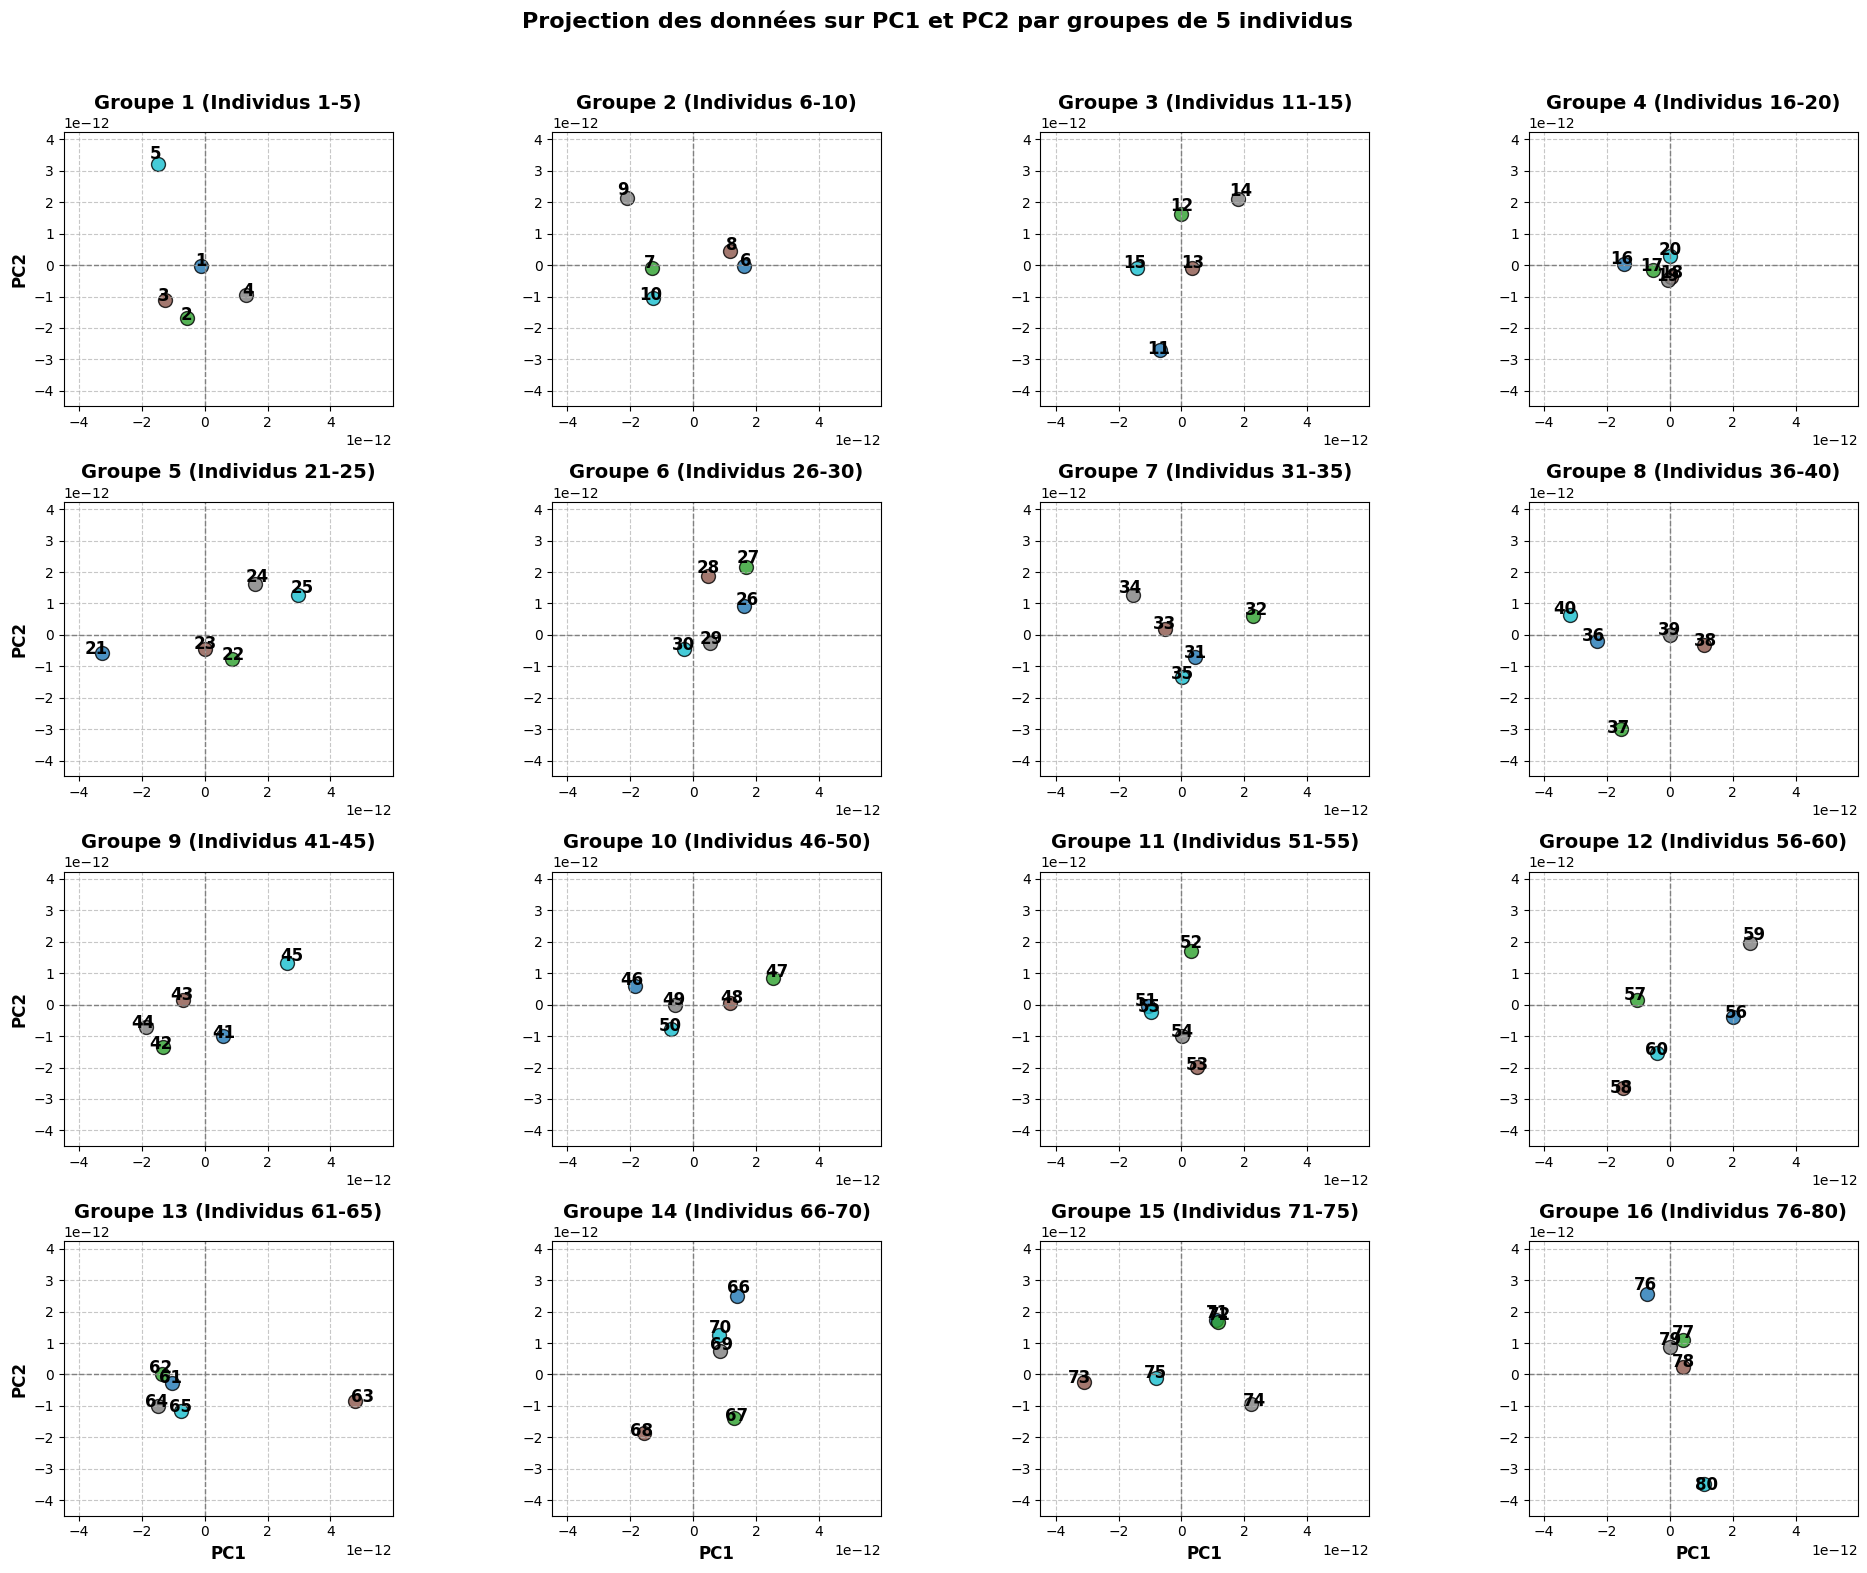

In [17]:
# Calculate the number of groups needed
C = np.dot(normalized_data, eigenvectors)

num_individuals = C.shape[0]
group_size = 5
num_groups = num_individuals // group_size + (1 if num_individuals % group_size > 0 else 0)

# Determine subplot grid dimensions
if num_groups <= 3:
    rows, cols = 1, num_groups
elif num_groups <= 6:
    rows, cols = 2, 3
elif num_groups <= 9:
    rows, cols = 3, 3
else:
    rows = (num_groups + 3) // 4
    cols = 4

# Create subplots
plt.figure(figsize=(5*cols, 4*rows))

# Define a color map for each point within a group
individual_cmap = plt.cm.get_cmap('tab10', group_size)

# Find common x and y limits for all plots
x_min, x_max = np.min(C[:, 0]), np.max(C[:, 0])
y_min, y_max = np.min(C[:, 1]), np.max(C[:, 1])
# Add some padding
x_padding = (x_max - x_min) * 0.15
y_padding = (y_max - y_min) * 0.15
x_min -= x_padding
x_max += x_padding
y_min -= y_padding
y_max += y_padding

# Create each subplot
for group_idx in range(num_groups):
    start_idx = group_idx * group_size
    end_idx = min(start_idx + group_size, num_individuals)
    
    # Get data for this group
    group_data = C[start_idx:end_idx]
    
    # Create subplot
    ax = plt.subplot(rows, cols, group_idx + 1)
    
    # Plot each point in the group with a different color
    for i, point_idx in enumerate(range(start_idx, end_idx)):
        ax.scatter(C[point_idx, 0], C[point_idx, 1], 
                  c=[individual_cmap(i)], 
                  s=100, 
                  alpha=0.8, 
                  edgecolors='k', 
                  linewidths=1)
        
        # Add label for each point
        ax.text(C[point_idx, 0]*1.05, C[point_idx, 1]*1.05, 
               f"{point_idx+1}", fontsize=12, ha='center', 
               weight='bold')
    
    # Set consistent plot boundaries for all subplots
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Add grid and reference lines
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.axvline(0, color='gray', linestyle='--', linewidth=1)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add title and labels
    ax.set_title(f"Groupe {group_idx + 1} (Individus {start_idx + 1}-{end_idx})", 
                fontsize=14, fontweight='bold')
    
    if group_idx % cols == 0:  # Only for plots on the left side
        ax.set_ylabel("PC2", fontsize=12, fontweight='bold')
    
    if group_idx >= (rows-1) * cols:  # Only for plots on the bottom row
        ax.set_xlabel("PC1", fontsize=12, fontweight='bold')
    
    # Set equal aspect ratio for proper scaling
    ax.set_aspect('equal')

plt.suptitle("Projection des données sur PC1 et PC2 par groupes de 5 individus", 
            fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the suptitle
plt.show()

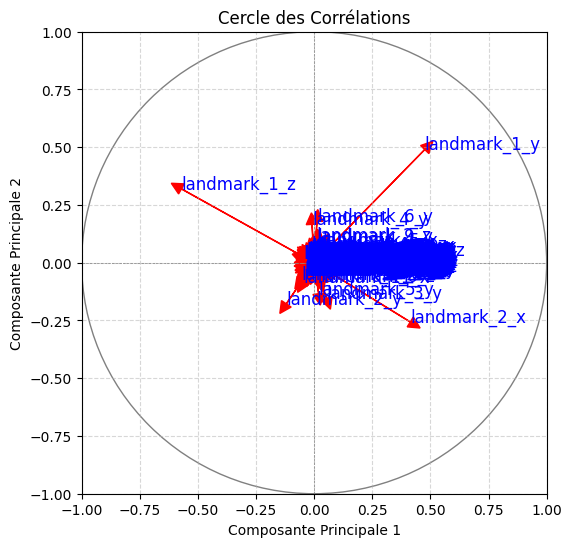

In [20]:
columns = data.columns[2:]

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)

pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]

for i in range(min(len(pc1), len(columns))):
    plt.arrow(0, 0, pc1[i], pc2[i], head_width=0.05, head_length=0.05, fc='r', ec='r')
    plt.text(pc1[i], pc2[i], columns[i], fontsize=12, color='blue')

cercle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(cercle)

plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Cercle des Corrélations")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [ ]:
projections_1_2 = C[:, :2]
contributions = (projections_1_2 ** 2) * 1/20 / eigenvalues[:2]
contributions *= 100

In [ ]:
individus = data.index.tolist()

df_contributions = pd.DataFrame(contributions, columns=['Axe 1', 'Axe 2'], index=individus)

In [ ]:
moyenne=np.mean(df_contributions,axis=0)

In [ ]:
cercle_corr = eigenvectors[:, :2] * np.sqrt(eigenvalues[:2])

In [ ]:
df_cercle_corr = pd.DataFrame(cercle_corr[:len(columns)], columns=['Axe 1', 'Axe 2'], index=columns)

In [ ]:
contribution_var=df_cercle_corr **2 /eigenvalues[:2]
contribution_var *= 100 
moyenne_var=np.mean(contribution_var,axis=0)
print("moyenne variable \n",moyenne_var)

moyenne variable 
 Axe 1    0.069863
Axe 2    0.069773
dtype: float64


In [ ]:
df_individu_corr = np.dot(normalized_data, eigenvectors[:, :2])


In [ ]:
m = df_individu_corr.shape[0]

gamma_i = (1 / m) * ((df_individu_corr ** 2) / eigenvalues[:2])

contribution_ind = pd.DataFrame(gamma_i, columns=[f"Comp {i+1}" for i in range(gamma_i.shape[1])])

In [ ]:
moyenne_ind=np.mean(contribution_ind,axis=0)

print("Moyenne des contributions γ_i par composante :\n", moyenne_ind)

Moyenne des contributions γ_i par composante :
 Comp 1    2.792069e-16
Comp 2    2.139369e-16
dtype: float64
